In [19]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

# Define the path to your data folders
#orchard_path = "mountdata/euroorchardsSR"
#forest_path = "mountdata/euroforestsSR"

#orchard_path = 'mountdata/*orchards2-50m'
#forest_path = 'mountdata/*forests2-50m'
orchard_path = ['mountdata/ngaorchards2-50m', 'mountdata/oilpalmorchards2-50m']#, 'mountdata/zaforchards2-50m'
forest_path = ['mountdata/ngaforests2-50m','mountdata/oilpalmforests2-50m']#,'mountdata/zafforests2-50m'

# Define hyperparameters
batch_size = 8
learning_rate = 0.001
num_epochs = 40

# Check if CUDA/GPU is available (optional but recommended for faster training)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
anomalies = ['/content/mountdata/euroorchards2-50m/Image_00000000000000003009.tif',
             '/content/mountdata/euroorchards2-50m/Image_000000000000000078e4.tif',
             '/content/mountdata/euroorchards2-50m/Image_Lat_37.07623913852226_Lon_-2.000375028081088.tif', '/content/mountdata/euroorchards2-50m/Image_Lat_37.94822972682675_Lon_-3.4164829633312706.tif', '/content/mountdata/euroorchards2-50m/Image_Lat_38.8801773878959_Lon_-6.697988937774733.tif', '/content/mountdata/euroorchards2-50m/Image_Lat_38.95187527373425_Lon_-2.361976909808175.tif', '/content/mountdata/euroorchards2-50m/Image_Lat_39.193589764538395_Lon_-3.8118669946392627.tif', '/content/mountdata/euroorchards2-50m/Image_Lat_40.14078309210926_Lon_-5.999096193263948.tif', '/content/mountdata/euroorchards2-50m/Image_Lat_41.54885126816007_Lon_1.9003128004417624.tif', '/content/mountdata/euroorchards2-50m/Image_Lat_42.25991289944572_Lon_12.57314441725815.tif', '/content/mountdata/euroorchards2-50m/Image_Lat_42.43071430619691_Lon_11.15069564030997.tif', '/content/mountdata/euroorchards2-50m/Image_Lat_42.44744039424839_Lon_-7.791226743048059.tif', '/content/mountdata/euroforests2-50m/Image_00000000000000007414.tif', '/content/mountdata/euroforests2-50m/Image_0000000000000000777f.tif', '/content/mountdata/euroforests2-50m/Image_000000000000000077ab.tif', '/content/mountdata/euroforests2-50m/Image_Lat_38.984007555925395_Lon_-5.195878320506741.tif', '/content/mountdata/euroforests2-50m/Image_Lat_39.11165378268132_Lon_-5.202214703103686.tif', '/content/mountdata/euroforests2-50m/Image_Lat_39.203841237860274_Lon_-5.200292830549653.tif', '/content/mountdata/euroforests2-50m/Image_Lat_39.511327469202726_Lon_-6.671992378633144.tif', '/content/mountdata/euroforests2-50m/Image_Lat_39.64780717514556_Lon_-7.256049893714537.tif', '/content/mountdata/euroforests2-50m/Image_Lat_39.70667176815209_Lon_-6.175261898582432.tif', '/content/mountdata/euroforests2-50m/Image_Lat_39.718064771343656_Lon_-5.773746603325954.tif', '/content/mountdata/euroforests2-50m/Image_Lat_39.720976564331544_Lon_-6.417043275902375.tif', '/content/mountdata/euroforests2-50m/Image_Lat_42.11554950284041_Lon_-7.790700569123754.tif', '/content/mountdata/euroforests2-50m/Image_Lat_42.4521046139503_Lon_-8.770396284273188.tif', '/content/mountdata/euroforests2-50m/Image_Lat_42.452519310348265_Lon_-8.670079887873815.tif', '/content/mountdata/euroforests2-50m/Image_Lat_42.453041025171515_Lon_-8.469456013277178.tif']

anomalies = ['mountdata/zaforchards2-50m/Image_Lat_-22.240004789245813_Lon_29.037818903248997.tif', 'mountdata/zaforchards2-50m/Image_Lat_-23.190591509848193_Lon_30.02648230297659.tif', 'mountdata/zaforchards2-50m/Image_Lat_-23.206826468411446_Lon_30.02780007043587.tif', 'mountdata/zaforchards2-50m/Image_Lat_-23.729701304546758_Lon_30.581030198896638.tif', 
             'mountdata/zaforchards2-50m/Image_Lat_-23.75421204450379_Lon_30.040246170137554.tif', 'mountdata/zaforchards2-50m/Image_Lat_-24.36739322183993_Lon_30.740867775354953.tif', 'mountdata/zaforchards2-50m/Image_Lat_-24.36793308158871_Lon_30.78216057550199.tif', 'mountdata/zaforchards2-50m/Image_Lat_-24.36912426208262_Lon_30.70107562081649.tif', 
             'mountdata/zaforchards2-50m/Image_Lat_-24.369803520775992_Lon_30.706244153045976.tif', 
             'mountdata/zaforchards2-50m/Image_Lat_-24.369990509567586_Lon_30.697764023623456.tif', 'mountdata/zaforchards2-50m/Image_Lat_-25.004242898951123_Lon_31.056674929441822.tif', 'mountdata/zaforchards2-50m/Image_Lat_-25.083577710663594_Lon_31.059082643615447.tif', 'mountdata/zaforchards2-50m/Image_Lat_-25.355981316561753_Lon_30.87019654213516.tif', 
             'mountdata/zaforchards2-50m/Image_Lat_-25.356378638983212_Lon_30.749683721086058.tif', 'mountdata/zaforchards2-50m/Image_Lat_-25.399142856245106_Lon_31.853747261479064.tif', 'mountdata/zaforchards2-50m/Image_Lat_-25.42440065060146_Lon_31.10614799508328.tif', 'mountdata/zaforchards2-50m/Image_Lat_-32.15294327380358_Lon_18.886208968452273.tif', 
             'mountdata/zaforchards2-50m/Image_Lat_-32.266605173370685_Lon_18.979176591008986.tif', 'mountdata/zaforchards2-50m/Image_Lat_-32.80791159156275_Lon_18.7056015650465.tif', 'mountdata/zaforchards2-50m/Image_Lat_-33.424104508473484_Lon_19.219134895787988.tif', 'mountdata/zaforchards2-50m/Image_Lat_-33.42747627667723_Lon_25.494554865159728.tif', 
             'mountdata/zaforchards2-50m/Image_Lat_-33.76617526466205_Lon_23.486430250833436.tif', 'mountdata/zaforchards2-50m/Image_Lat_-33.81678984759524_Lon_23.75666510651492.tif', 'mountdata/zafforests2-50m/Image_Lat_-22.750359611743477_Lon_30.076954472051707.tif', 'mountdata/zafforests2-50m/Image_Lat_-24.893520791446683_Lon_31.057298004159495.tif', 'mountdata/zafforests2-50m/Image_Lat_-25.382506281880506_Lon_29.54393489111359.tif', 'mountdata/zafforests2-50m/Image_Lat_-25.38360708957488_Lon_29.41490838960512.tif', 
 'mountdata/zafforests2-50m/Image_Lat_-25.663925262990297_Lon_31.10501855033152.tif', 'mountdata/zafforests2-50m/Image_Lat_-26.299960611462208_Lon_25.683737847721723.tif', 'mountdata/zafforests2-50m/Image_Lat_-27.963598186452764_Lon_32.084100119337684.tif', 
             'mountdata/zafforests2-50m/Image_Lat_-28.315390968743124_Lon_32.45090360985396.tif', 'mountdata/zafforests2-50m/Image_Lat_-28.4597026176856_Lon_32.415726424788375.tif', 'mountdata/zafforests2-50m/Image_Lat_-28.937286098156267_Lon_30.947486221372245.tif', 'mountdata/zafforests2-50m/Image_Lat_-28.98745723719802_Lon_29.846632525779782.tif', 'mountdata/zafforests2-50m/Image_Lat_-29.803715878804166_Lon_30.26411985853742.tif', 'mountdata/zafforests2-50m/Image_Lat_-32.68005997185722_Lon_27.002089587012645.tif']

anoms = [x[9:] + '.npy' for x in anomalies]
print(anoms[0])

/zaforchards2-50m/Image_Lat_-22.240004789245813_Lon_29.037818903248997.tif.npy


In [4]:
from torchvision.models import resnet18 as rnet18
dropout_prob = .3
class ComplexCNN(nn.Module):
    def __init__(self, num_classes=2, dropout_prob=0.5):
        super(ComplexCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(128 * 19 * 19, 512)  # Adjusted for 156x156 input
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

class SmallComplexModel(nn.Module):
    def __init__(self, num_classes=2):
        super(SmallComplexModel, self).__init__()
        
        # Load the pre-trained MobileNetV2 model
        mobilenet_v2 = models.mobilenet_v2(pretrained=True)
        
        # Remove the classification head of MobileNetV2
        self.features = mobilenet_v2.features
        
        # Add custom layers for your task
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(1280, num_classes)
        )

    def forward(self, x):
        # Feature extraction with MobileNetV2
        x = self.features(x)
        
        # Global average pooling
        x = self.avgpool(x)
        
        # Reshape for fully connected layer
        x = x.view(x.size(0), -1)
        
        # Fully connected layers
        x = self.fc(x)
        
        return x

# Create an instance of the model
#model = SmallComplexModel().to(device)

class ResModel(nn.Module):
    def __init__(self, num_classes=2):
        super(ResModel, self).__init__()
        
        # Load the pre-trained MobileNetV2 model
        resnet18 = rnet18(pretrained=True)
        
       # Remove the classification head of ResNet18
        self.features = nn.Sequential(*list(resnet18.children())[:-1])

        # Add custom layers for your task
#        self.fc = nn.Sequential(
#            nn.Flatten(),
#            nn.Linear(512, num_classes)
#        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512, 512),  # You can adjust the output size of the linear layer
            nn.ReLU(),           # Add activation function
            nn.Dropout(p=dropout_prob),  # Dropout layer
            nn.Linear(512, num_classes)
        )


    def forward(self, x):
        # Feature extraction with ResNet18
        x = self.features(x)

        # Fully connected layers
        x = self.fc(x)

        return x

model = ResModel().to(device)
        

# Print the model architecture
#print(model)
# Instantiate the model
#complex_model = ComplexCNN().to(device)
#model = ComplexCNN().to(device)
# Instantiate the model
#complex_model = ComplexCNN().to(device)
#model = ComplexCNN().to(device)

/home/angelats11/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/angelats11/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


     |████████████████████████████████| 49.6 MB 360 kB/s eta 0:00:01


In [36]:
#shape = (160,160,3)
shape = (50, 50, 12)
#from PIL import Image
#import cv2
#import tifffile

from PIL import Image
import rasterio as rio
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision.transforms import ToTensor


anomalies = []
'''
class ToTensorCustom(object):
    def __call__(self, pic):
        if isinstance(pic, np.ndarray):
            if pic.dtype == np.uint16:
                pic = pic.astype(np.float32) / 65535.0  # Normalize to [0, 1]
            return torch.from_numpy(pic)
        else:
            raise TypeError('Unsupported type for conversion to tensor.')
'''

class CustomDatasetS2(Dataset):
    def __init__(self, data_dir, transform=None, num_channel=12):
        self.data_dir = data_dir
        self.transform = transform
        self.file_list = []
        for dira in data_dir:
            self.file_list.extend([os.path.join(dira, f) for f in os.listdir(dira)])
        self.num_channel = num_channel

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_name = self.file_list[idx]
        #print(img_name)
        #img_name = os.path.join(self.data_dir, self.file_list[idx])
        if img_name.endswith('.tif'):
            if img_name in anomalies:
                pass
            with rio.open(img_name) as img :
                image= img.read()
                image = image.astype('float32')
    
                image = image[:self.num_channel,:50,:50]
                image = np.transpose(image,(1,2,0))
                #print
                if image.shape != (50,50,self.num_channel):
                    print('anomaly')
                    anomalies.append(img_name)
                    return torch.zeros(50, 50,self.num_channel), -1
                    #return torch.zeros(10, 10,12), -1
                
                if self.transform:
                    image = self.transform(image)
            label = 0 if "orchard" in self.data_dir else 1  # Assuming "orchard" is class 0 and "forest" is class 1
            return image, label, img_name



'''
class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        #self.file_list = os.listdir(data_dir)
        self.file_list = []
        for dira in data_dir:
            self.file_list.extend([os.path.join(dira, f) for f in os.listdir(dira)])


    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_name = self.file_list[idx]
        #if img_name in anoms:
        #    return torch.zeros(160, 160, 3)
        #image = np.squeeze(np.load(img_name, allow_pickle=True))
#        image = Image.open(img_name)
        #print(img_name)
        #image = cv2.imread(img_name, cv2.IMREAD_UNCHANGED)
        #print(image)
        #channels = cv2.split(image)
        #print(channels)
        #stacked_image = np.stack(channels, axis=-1)
        #image = torch.from_numpy(stacked_image)
        image = tifffile.imread(img_name)
        image_array = np.array(image,dtype=np.float32)#.astype(float)
        #torch_image = torch.from_numpy(image_array)

        label = 0 if any("orchard" in d for d in self.data_dir) else 1
        if self.transform:
            image = self.transform(image)
        return image, label, img_name

        ###
        img_name = os.path.join(self.data_dir, self.file_list[idx])
        if img_name in anoms:
          #return torch.zeros(50,50,3), -1
          return torch.zeros(160,160,3)
        image = np.squeeze(np.load(img_name, allow_pickle=True))
        #image = np.squeeze(np.load(img_name))[:,53:103,53:103]#.unsqueeze(0).unsqueeze(0)
        #print(image)
        #print(image.shape)
        #print(image)
        #if self.transform:
        #    image = self.transform(image)
        label = 0 if "orchard" in self.data_dir else 1  # Assuming "orchard" is class 0 and "forest" is class 1
        return image, label, img_name
        ###
'''


# Data augmentation and normalization
transform = transforms.Compose([transforms.ToTensor()])#, transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])#, transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Create data loaders for training and validation
#orchard_dataset = CustomDataset(orchard_path, transform)
#forest_dataset = CustomDataset(forest_path, transform)
#dataset = CustomDataset(orchard_path, transform) + CustomDataset(forest_path, transform)
datasets2 = CustomDatasetS2(orchard_path, transform, 3) + CustomDatasetS2(forest_path, transform, 3)
print(datasets2)
split_ratio = 0.8
num_data = len(datasets2)
split = int(np.floor(split_ratio * num_data))
indices = list(range(num_data))

#indices = [idx for idx in indices if datasets2[idx][1] != -1]
#print('datasets')
#print(datasets2[idx])

np.random.shuffle(indices)


# Create data samplers for training and testing sets
train_indices, test_indices = indices[:split], indices[split:]
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)

# Create data loaders for training and testing
train_loader = DataLoader(datasets2, batch_size=batch_size, sampler=train_sampler)
test_loader = DataLoader(datasets2, batch_size=batch_size, sampler=test_sampler)
# Use DataLoader to handle batching and shuffling
#orchard_loader = DataLoader(orchard_dataset, batch_size=batch_size, shuffle=True)
#forest_loader = DataLoader(forest_dataset, batch_size=batch_size, shuffle=True)

In [38]:
import torch.nn as nn

class s250CNN(nn.Module):
    def __init__(self, num_classes=2):
        super(s250CNN, self).__init__()
        # Define your model layers
        self.conv1 = nn.Conv2d(12, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 25 * 25, 64)  # Adjusted for 50x50 input
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(x.size(0), -1)  # Ensure correct flattening
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

# Create an instance of the modified model
model = s250CNN().to(device)

class RGB50CNN(nn.Module):
    def __init__(self, num_classes=2):
        super(RGB50CNN, self).__init__()
        # Define your model layers
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 12 * 12, 64)  # Adjusted for 50x50 input
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(x.size(0), -1)  # Ensure correct flattening
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

# Create an instance of the modified model
model = RGB50CNN().to(device)


In [39]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [40]:
import torch.nn.functional as F
num_epochs = 30

def train(model, train_loader, optimizer, criterion):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for batch, (images, labels, img_name) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_accuracy = 100 * correct / total
    return total_loss / (batch + 1), train_accuracy

def validate(model, val_loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    misclassified_paths = []
    with torch.no_grad():
        for batch, (images, labels, img_name) in enumerate(val_loader):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            incorrect_indices = (predicted != labels).nonzero()
            misclassified_paths.extend([img_name[i] for i in incorrect_indices])


    val_accuracy = 100 * correct / total
    return total_loss / (batch + 1), val_accuracy, misclassified_paths


In [41]:

# ... (optimizer and criterion)

# Training loop with validation
trnl = []
vall = []
trna=[]
vala=[]
epochs = [x for x in range(num_epochs)]
mistakes = []
for epoch in range(num_epochs):
    train_loss, train_accuracy = train(model, train_loader, optimizer, criterion)
    val_loss, val_accuracy, misclf = validate(model, test_loader, criterion)
    trnl.append(train_loss)
    vall.append(val_loss)
    trna.append(train_accuracy)
    vala.append(val_accuracy)
    print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")
    if epoch == 20:
        print('epoch 20 erros')
    if epoch == num_epochs-1:
        print('last epoch errors')
        print(misclf)
        mistakes = misclf
        
print("Training complete.")
import matplotlib.pyplot as plt
plt.plot(epochs,trnl,label='train loss')
plt.plot(epochs,vall,label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(epochs,trna,label='train acc')
plt.plot(epochs,vala,label='val acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

anomaly


RuntimeError: each element in list of batch should be of equal size

In [ ]:
#model.train(train_loader)

ValueError: ignored

NEXT: THE PART WHERE WE TRAIN ON SENTINEL-2 ALONE AS A BENCHMARK (BOTTOM TIE PERFOMANCE TO BEAT)


In [ ]:
#orchard_path = "mountdata/euroorchards2-50m"
#forest_path = "mountdata/euroforests2-50m"

orchard_path = 'mountdata/zaforchards2-50m'
forest_path = 'mountdata/zafforests2-50m'

In [ ]:
#import tifffile
from PIL import Image
import rasterio as rio

#import cv2
#import gdal
from torch.utils.data.sampler import SubsetRandomSampler
#import imagecodecs
from skimage import io

anomalies = []
class CustomDatasetS2(Dataset):
    def __init__(self, data_dir, transform=None, num_channel=12):
        self.data_dir = data_dir
        self.transform = transform
        self.file_list = os.listdir(data_dir)
        self.num_channel = num_channel

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data_dir, self.file_list[idx])
        if img_name.endswith('.tif'):
            if img_name in anomalies:
                pass
            with rio.open(img_name) as img :
                image= img.read()
                image = image.astype('float32')
    
                image = image[:self.num_channel,2:52,2:52]
                image = np.transpose(image,(1,2,0))
                #print
                if image.shape != (50,50,self.num_channel):
                    print('anomaly')
                    anomalies.append(img_name)
                    return torch.zeros(50, 50,self.num_channel), -1
                    #return torch.zeros(10, 10,12), -1
                
                if self.transform:
                    image = self.transform(image)
            label = 0 if "orchard" in self.data_dir else 1  # Assuming "orchard" is class 0 and "forest" is class 1
            return image, label

transform = transforms.Compose([transforms.ToTensor()])
bicubtransform = transforms.Compose([transforms.ToPILImage(), transforms.Resize((160, 160), interpolation=Image.BICUBIC), transforms.ToTensor()])

datasets2 = CustomDatasetS2(orchard_path, transform, 3) + CustomDatasetS2(forest_path, transform, 3)
#split_ratio = 0.8
#num_data = len(datasets2)
#split = int(np.floor(split_ratio * num_data))
#indices = list(range(num_data))
#indices = [idx for idx in indices if datasets2[idx][1] != -1]
#np.random.shuffle(indices)


# Create data samplers for training and testing sets
train_indices, test_indices = indices[:split], indices[split:]
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)

# Create data loaders for training and testing
train_loader = DataLoader(datasets2, batch_size=batch_size, sampler=train_sampler)
test_loader = DataLoader(datasets2, batch_size=batch_size, sampler=test_sampler)

print(anomalies)

In [ ]:
#input_size = (3, 50, 50)  # Assuming 3 channels, 160x160 size
#dummy_input = torch.randn(1, *input_size).to(device)  # Create a dummy input
#output = model(dummy_input)

In [ ]:
import rasterio as rio
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# Training loop with validation
trnl = []
vall = []
trna=[]
vala=[]
epochs = [x for x in range(num_epochs)]
mistakes_s2 = []
for epoch in range(num_epochs):
    train_loss, train_accuracy = train(model, train_loader, optimizer, criterion)
    val_loss, val_accuracy, misclf = validate(model, test_loader, criterion)
    trnl.append(train_loss)
    vall.append(val_loss)
    trna.append(train_accuracy)
    vala.append(val_accuracy)
    print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")
    if epoch == 20:
        print('epoch 20 erros')
    if epoch == num_epochs-1:
        print('last epoch errors')
        print(misclf)
        mistakes_s2 = misclf
        
print("Training complete.")
import matplotlib.pyplot as plt
plt.plot(epochs,trnl,label='train loss')
plt.plot(epochs,vall,label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(epochs,trna,label='train acc')
plt.plot(epochs,vala,label='val acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Training complete.


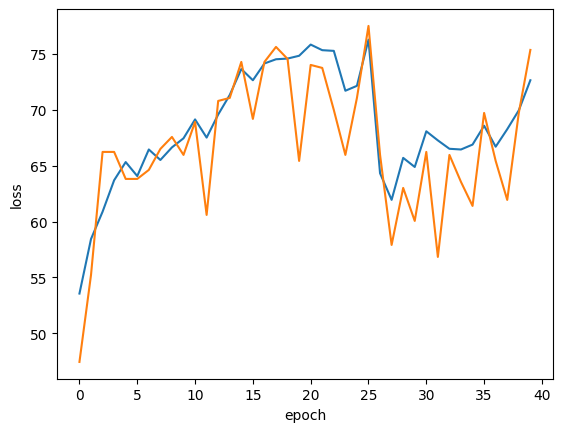

In [14]:
print("Training complete.")
import matplotlib.pyplot as plt
plt.plot(epochs,trna,label='train loss')
plt.plot(epochs,vala,label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Training complete.


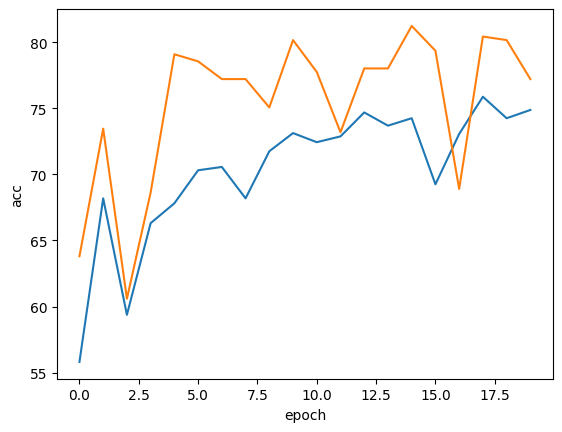

In [ ]:
print("Training complete.")
import matplotlib.pyplot as plt
plt.plot([x for x in range(20)],trna,label='train loss')
plt.plot([x for x in range(20)],vala,label='val loss')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [ ]:
# Convert the NumPy array to a NumPy array with data type 'uint8'

class CustomDatasetS2(Dataset):
    def __init__(self, data_dir, transform=None, num_channel=12):
        self.data_dir = data_dir
        self.transform = transform
        self.file_list = os.listdir(data_dir)
        self.num_channel = num_channel

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data_dir, self.file_list[idx])
        if img_name.endswith('.tif'):
            if img_name in anomalies:
                pass
            with rio.open(img_name) as img :
                image= img.read()
                image = image.astype('float32')
                image = (image * 255).astype('uint8')
                image = image[:self.num_channel,2:52,2:52]
                image = np.transpose(image,(1,2,0))
                #print
                if image.shape != (50,50,self.num_channel):
                    print('anomaly')
                    anomalies.append(img_name)
                    return torch.zeros(50, 50,self.num_channel), -1
                    #return torch.zeros(10, 10,12), -1
                
                if self.transform:
                    image = self.transform(image)
            label = 0 if "orchard" in self.data_dir else 1  # Assuming "orchard" is class 0 and "forest" is class 1
            return image, label


In [ ]:
num_epochs = 40
datasets2bicub = CustomDatasetS2(orchard_path, bicubtransform, 3) + CustomDatasetS2(forest_path, bicubtransform, 3)

# Create data loaders for training and testing
train_loader = DataLoader(datasets2bicub, batch_size=batch_size, sampler=train_sampler)
test_loader = DataLoader(datasets2bicub, batch_size=batch_size, sampler=test_sampler)

model = ResModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# Training loop with validation
trnl = []
vall = []
trna=[]
vala=[]
epochs = [x for x in range(num_epochs)]
mistakes_bicub = []
for epoch in range(num_epochs):
    train_loss, train_accuracy = train(model, train_loader, optimizer, criterion)
    val_loss, val_accuracy, misclf = validate(model, test_loader, criterion)
    trnl.append(train_loss)
    vall.append(val_loss)
    trna.append(train_accuracy)
    vala.append(val_accuracy)
    print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")
    if epoch == 20:
        print('epoch 20 erros')
    if epoch == num_epochs-1:
        print('last epoch errors')
        print(misclf)
        mistakes_bicub = misclf
        
print("Training complete.")
import matplotlib.pyplot as plt
plt.plot(epochs,trnl,label='train loss')
plt.plot(epochs,vall,label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(epochs,trna,label='train acc')
plt.plot(epochs,vala,label='val acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()